## The Law of Large Numbers and the Central Limit Theorem
In this notebook, we will illustrate the Law of Large Numbers and the Central Limit Theorem for the $t_{\nu}$ distribution for different values of $\nu$.

### Imports 

In [1]:
from scipy.stats import t, norm
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('poster')

### Solver class

In [2]:
class Solver:
    def __init__(self, dfs: int, M: int, N: int, random_seed: int = 2023, first_ns: list = None):
        """
        Illustrate the Law of Large Numbers and the Central Limit Theorem for the t-distribution.
        """
        self.dfs = dfs
        self.M = M
        self.N = N
        self.random_seed = random_seed
        numpy.random.seed(random_seed)
        if first_ns is None:
            self.first_ns = [5, 10, 100, 500, 1_000, 10_000]
        else:
            self.first_ns = first_ns

        self.t_random_samples: list = None
        self.n_first_means: dict = None
        self.n_first_means_stats: dict = None
        self.n_first_means_stats_df: pandas.DataFrame = None
        self.fig_sample_mean_distributions = None

    def draw_random_samples(self) -> list:
        """
        Draw M i.i.d. random samples of length N from the t-distribution.
        """
        self.t_random_samples = []
        for i in range(self.M):
            self.t_random_samples.append(
                t.rvs(df=self.dfs, size=self.N)
            )
        return self.t_random_samples

    def compute_sample_means(self) -> dict:
        """
        For each sample compute the sample means for the first n = 5, 10, 100, 500, 1000, 10000 draws of the sample.
        """
        self.n_first_means = {}
        for n_first in self.first_ns:
            self.n_first_means[n_first] = [
                numpy.mean(sample[:n_first])
                for sample in self.t_random_samples
            ]
        return self.n_first_means

    def compute_sample_mean_stats(self) -> pandas.DataFrame:
        """
        For each n, compute the mean, standard deviation and variance of the sample means across the M samples.
        This yields means, standard deviations, and variances for each of the six different values of n.
        Report your results in a table.
        """
        self.n_first_means_stats = {}
        for n_first, means in self.n_first_means.items():
            mean = numpy.mean(means)
            var = numpy.var(means)
            std = var**0.5
            self.n_first_means_stats[n_first] = {
                'mean': mean,
                'std': std,
                'variance': var,
            }
        self.n_first_means_stats_df = \
        pandas.DataFrame(self.n_first_means_stats)

        return self.n_first_means_stats_df

    def plot_sample_mean_distributions(
        self, figsize: tuple = (15, 10), n_bins: int = None
    ):
        """
        For each n, plot the distributions of the M sample means.
        """
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        axes = axes.ravel()
        for ax, n_first in zip(axes, self.n_first_means):
            ax.hist(self.n_first_means[n_first], bins=n_bins)
            ax.set_ylabel('Count')
            ax.set_title(f'First n = {n_first}')
        fig.tight_layout()
        self.fig_sample_mean_distributions = fig
        return self.fig_sample_mean_distributions

### Simulations & Analysis

We start with 100 degrees of freedom and fix M=1,000 and N=20,000:

In [3]:
M = 1_000
N = 20_000
solver = Solver(dfs=100, M=M, N=N)

a) Draw $M$ i.i.d. random samples of length $N$ from the $t_{\nu}$ distribution.

In [4]:
random_samples_100 = solver.draw_random_samples()

b) For each sample $m=1,...,M$, compute the sample means for the first $n= 5, 10, 100, 500, 1000, 10000$ draws of the sample.

In [5]:
sample_means_100 = solver.compute_sample_means()

c) For each $n$, compute the mean, standard deviation and variance of the sample means across the $M$ samples. This yields means, standard deviations, and variances for each of the six different values of 𝑛. Report your results in a table.

In [6]:
sample_mean_stats_100 = solver.compute_sample_mean_stats()
sample_mean_stats_100.round(3)

,5,10,100,500,1000,10000
mean,-0.003,0.005,0.000,0.000,-0.002,-0.00
std,0.465,0.318,0.098,0.046,0.031,0.01
variance,0.216,0.101,0.010,0.002,0.001,0.00


d) For each 𝑛, plot the distributions of the 𝑀 sample means.

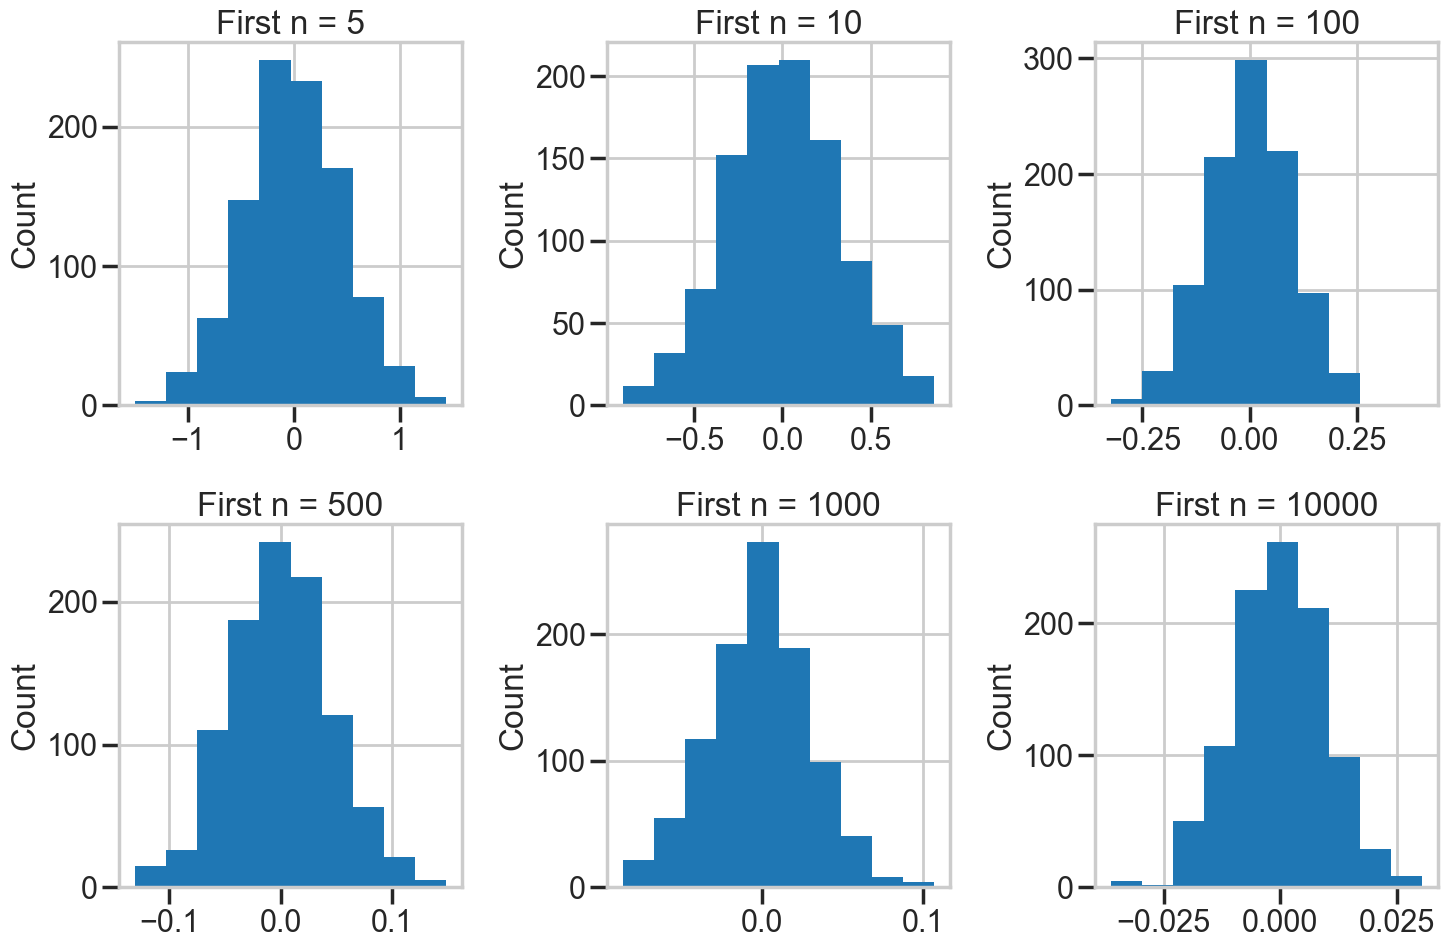

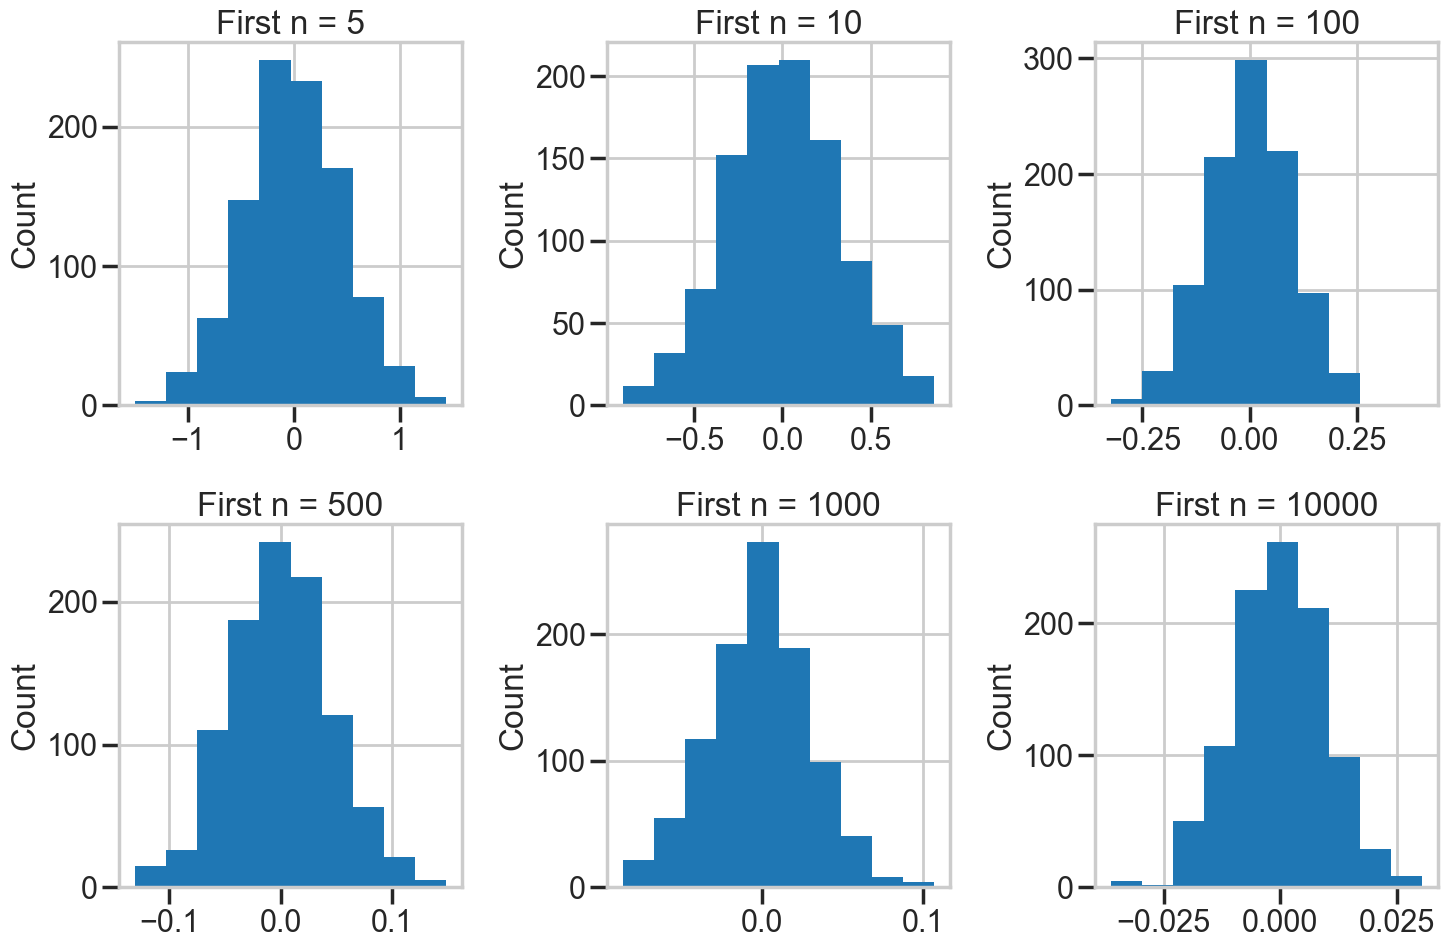

In [7]:
solver.plot_sample_mean_distributions()

e) Describe how these simulations relate to the LLN and the CLT. Be careful to distinguish the implications of the LLN and the CLT.

- **The (Weak) Law of Large Numbers**: the sample mean covergence in probability to the true mean.<br>
- **The Central Limit Theorem**: the sample mean of iid random variables $X_1, ..., X_n$ converges to $N\left(\mu, \dfrac{\sigma^2}{n}\right)$, where $\mu$ is the true mean of $X$, $\sigma^2$ is the true variance of $X$ and $n$ is the number of draws of the random variable $X$.

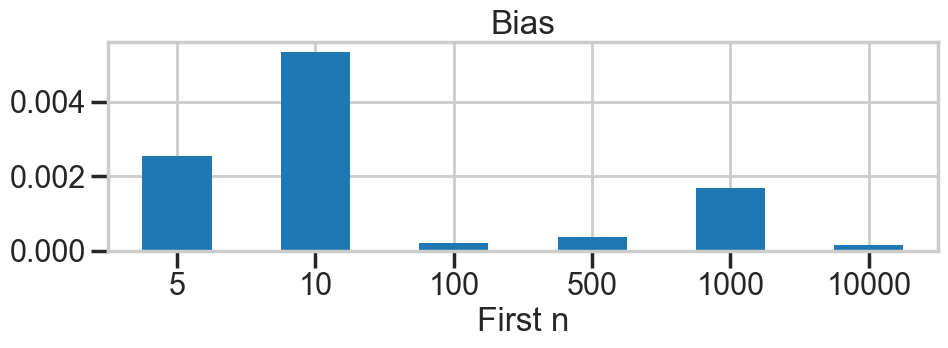

In [8]:
true_mean = 0.0
bias = (sample_mean_stats_100.loc['mean'] - true_mean).abs()

plt.figure(figsize=(10, 4))
bias.plot(kind='bar')
plt.title('Bias')
plt.xlabel('First n')
plt.xticks(rotation=0)
plt.tight_layout();

- We can see above that, generally speaking, in our simulations the bias decreases as "first n" increases, that is, the sample mean convergence to the true mean.
- Convergence to the true mean is guaranteed in theory by the Weak Law of Large Numbers, but in our simulations we see that it does not hold strictly. Convergence of variance to $\dfrac{\sigma^2}{n}$ can be seen seen in the plot below. That is, greater number of draws $n$ leads to a smaller variance of the sample mean.

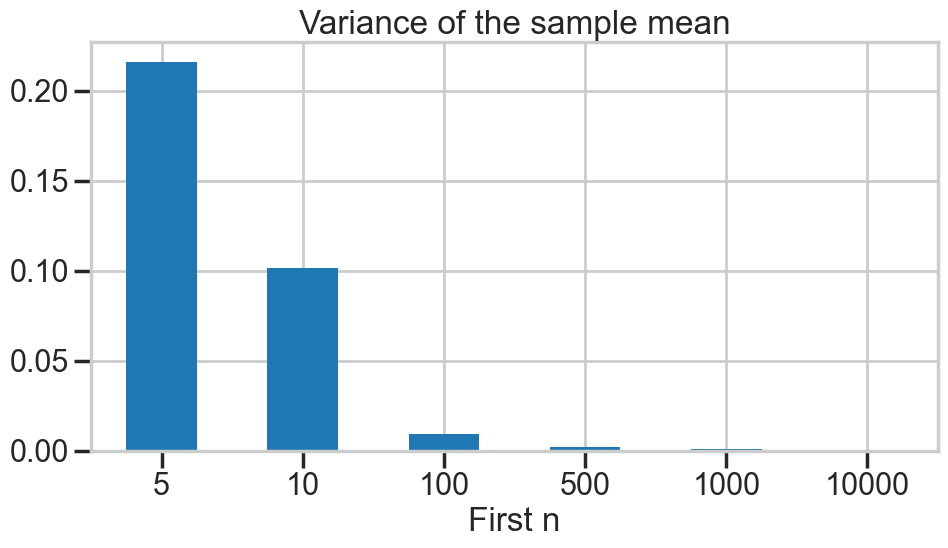

In [9]:
plt.figure(figsize=(10, 6))
sample_mean_stats_100.loc['variance'].plot(kind='bar')
plt.title('Variance of the sample mean')
plt.xlabel('First n')
plt.xticks(rotation=0)
plt.tight_layout();

Finally, in the plot below we can see that the distribution of the sample mean looks normal even with a few draws:

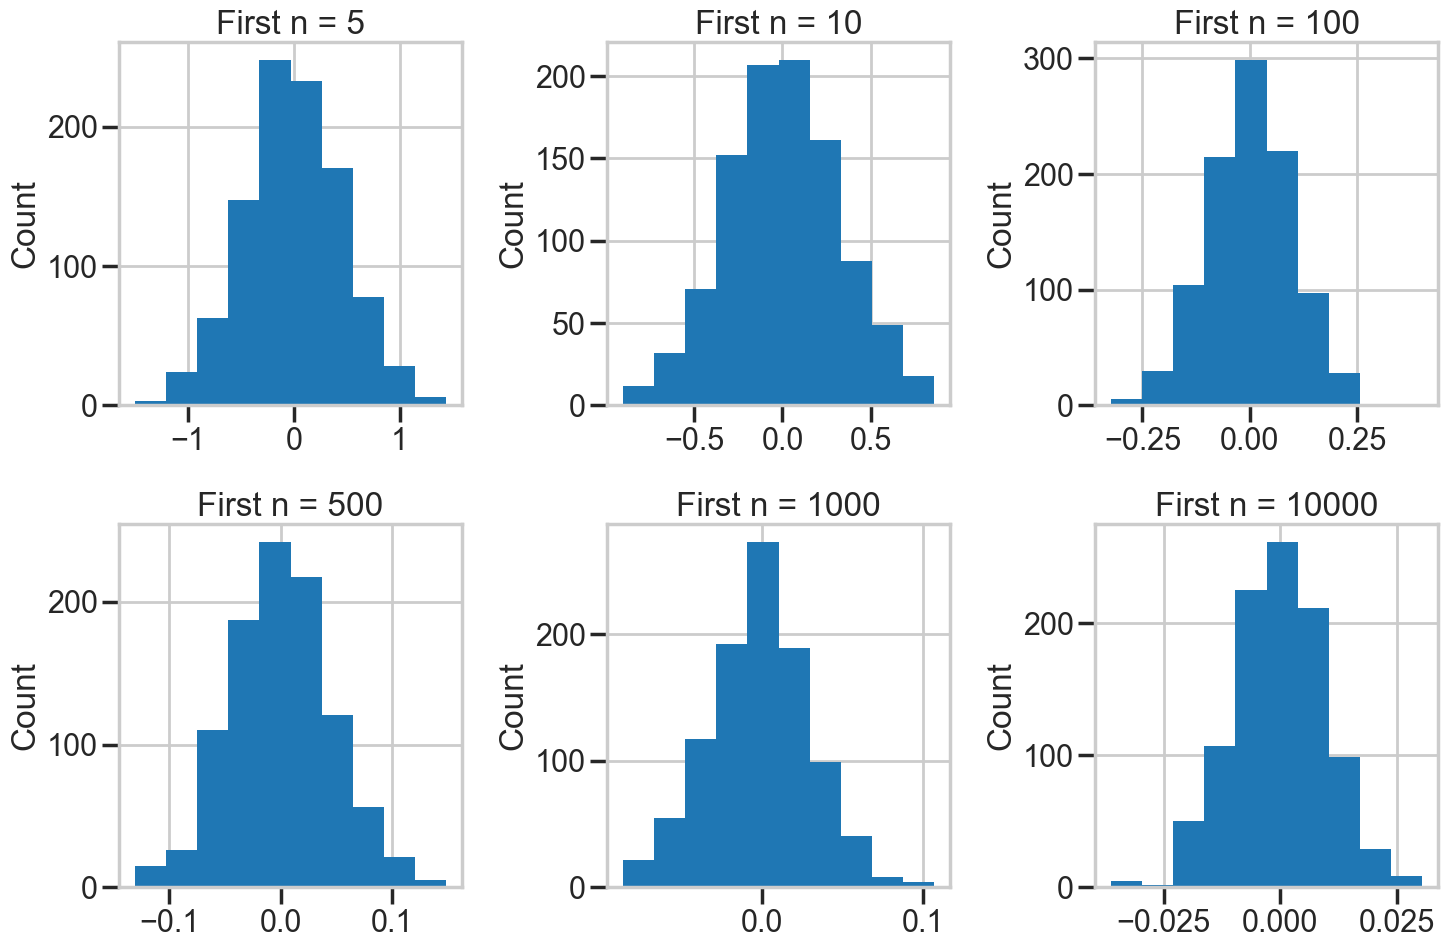

In [10]:
solver.fig_sample_mean_distributions

In [11]:
solutions = {
    100: {
        'random_samples': random_samples_100,
        'sample_means': sample_means_100,
        'sample_mean_stats': sample_mean_stats_100,
        'sample_mean_distributions': solver.fig_sample_mean_distributions,
    }
}

f) Repeat steps (a) to (e) for $\nu = 10, 5, 2, 1, 0.5$.

Degrees of freedom = 10


,5,10,100,500,1000,10000
mean,-0.024649,-0.014912,-0.002934,-0.001328,-0.000584,-0.000320
std,0.504997,0.360866,0.110523,0.048380,0.034875,0.011108
variance,0.255022,0.130224,0.012215,0.002341,0.001216,0.000123


--------------------------------------------------
Degrees of freedom = 5


,5,10,100,500,1000,10000
mean,-0.016844,-0.020260,-0.001663,-0.000229,-0.001161,-0.000828
std,0.572519,0.410590,0.128266,0.057670,0.040640,0.012916
variance,0.327778,0.168584,0.016452,0.003326,0.001652,0.000167


--------------------------------------------------
Degrees of freedom = 2


,5,10,100,500,1000,10000
mean,0.060836,0.046015,0.002865,0.004378,0.001896,0.001633
std,1.940998,1.183712,0.317757,0.202431,0.123597,0.044093
variance,3.767474,1.401174,0.100970,0.040978,0.015276,0.001944


--------------------------------------------------
Degrees of freedom = 1


,5,10,100,500,1000,10000
mean,-0.304917,-0.324287,-0.662916,0.411120,0.176983,-0.593639
std,9.468879,8.975132,27.038573,25.372650,15.254129,24.732656
variance,89.659669,80.553003,731.084445,643.771353,232.688451,611.704256


--------------------------------------------------
Degrees of freedom = 0.5


,5,10,100,500,1000,10000
mean,-2.357056e+01,-2.586797e+03,-2.322233e+05,6.054781e+06,-1.170251e+07,-1.538335e+06
std,2.367828e+04,1.174945e+05,6.965215e+06,1.535690e+08,4.694945e+08,4.874025e+07
variance,5.606611e+08,1.380496e+10,4.851422e+13,2.358343e+16,2.204251e+17,2.375612e+15


--------------------------------------------------


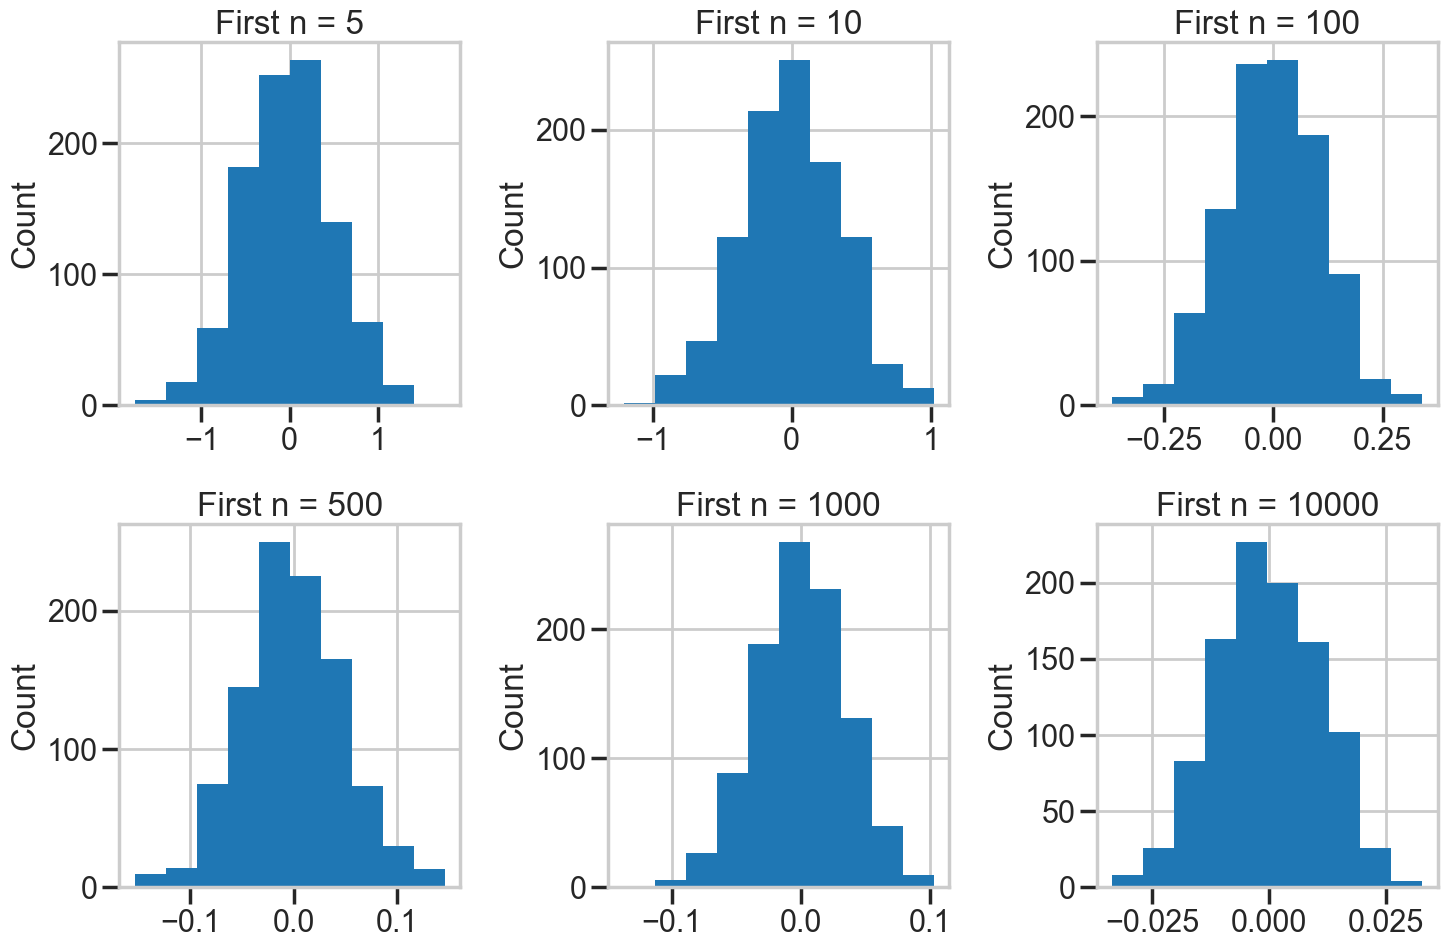

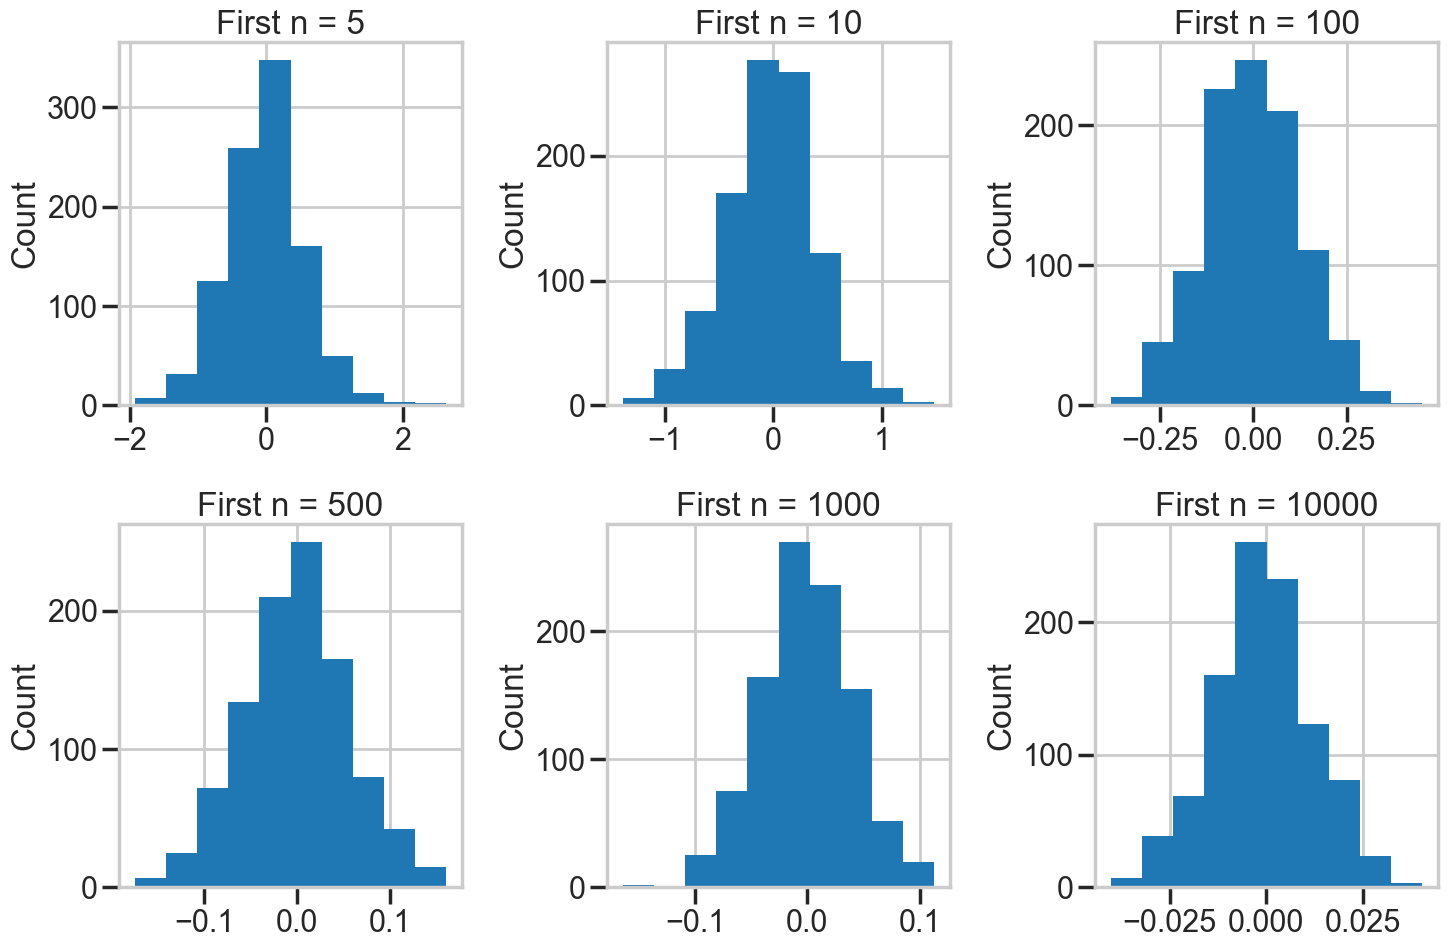

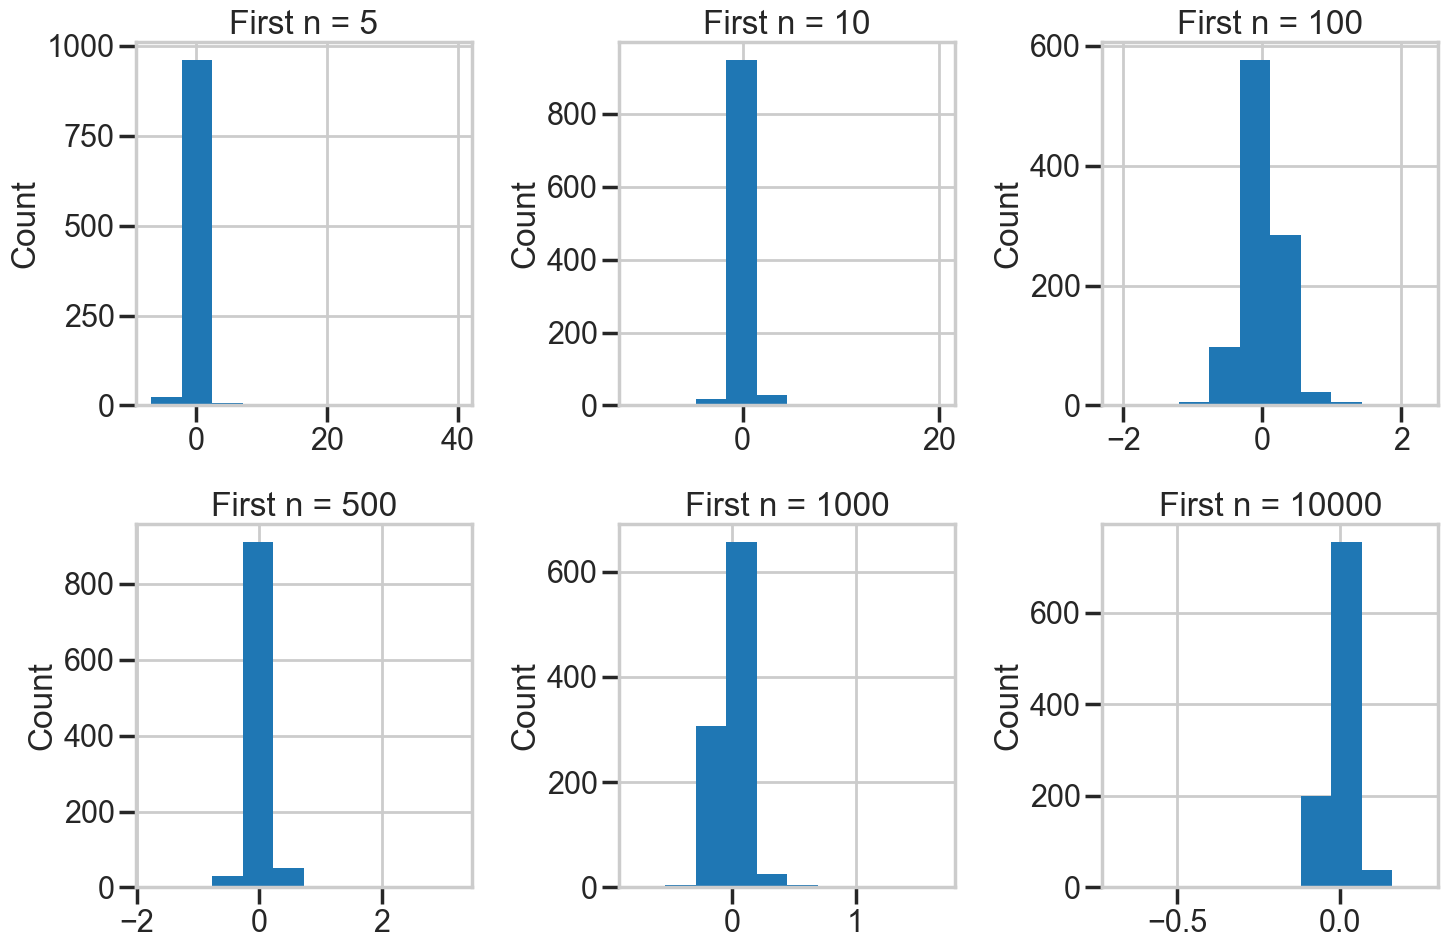

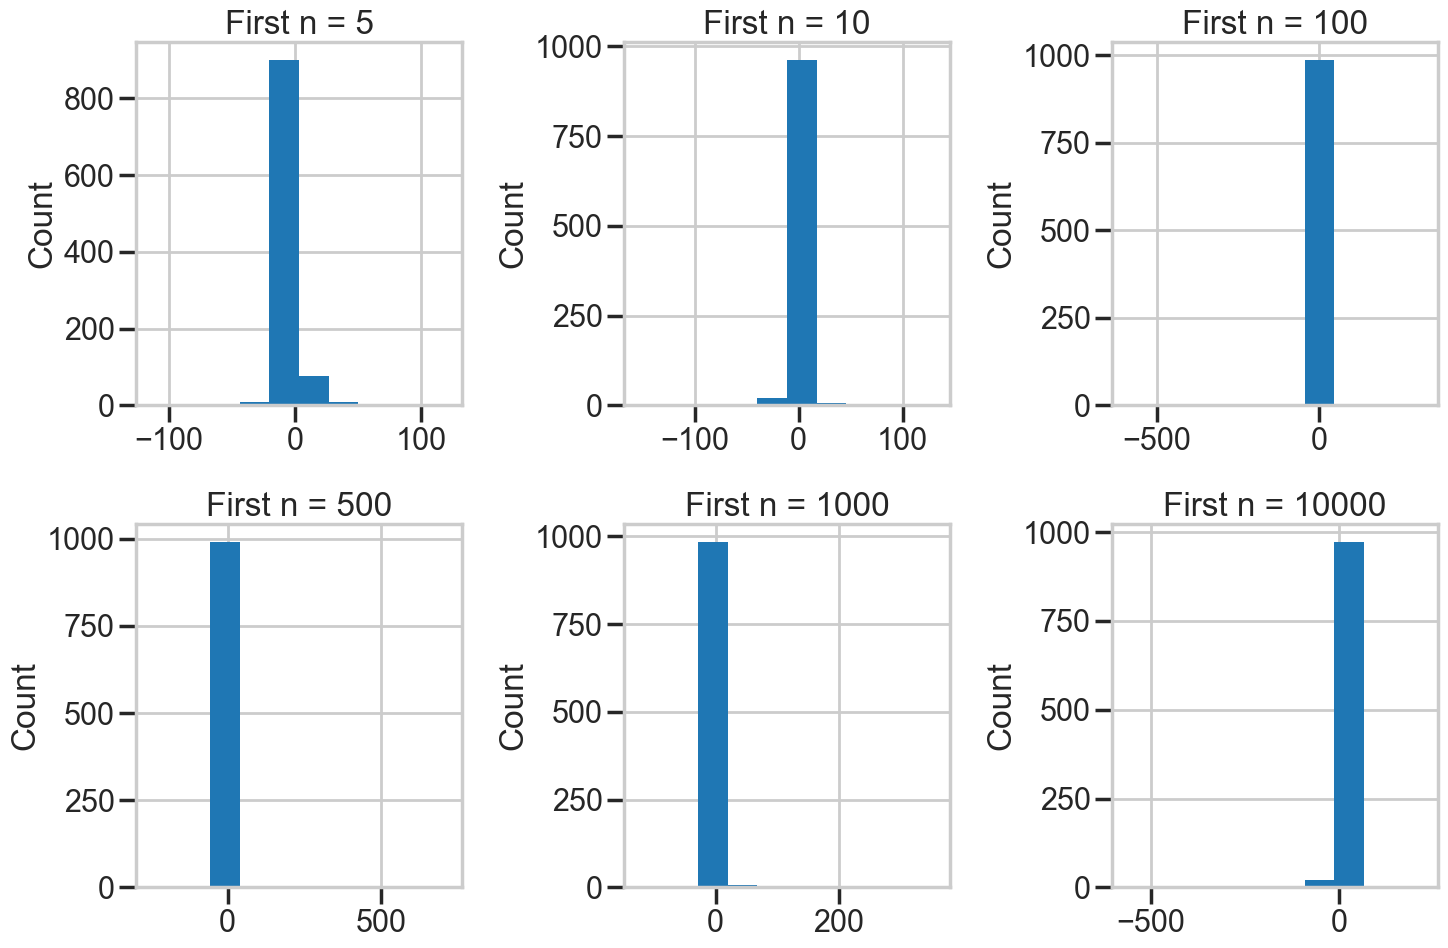

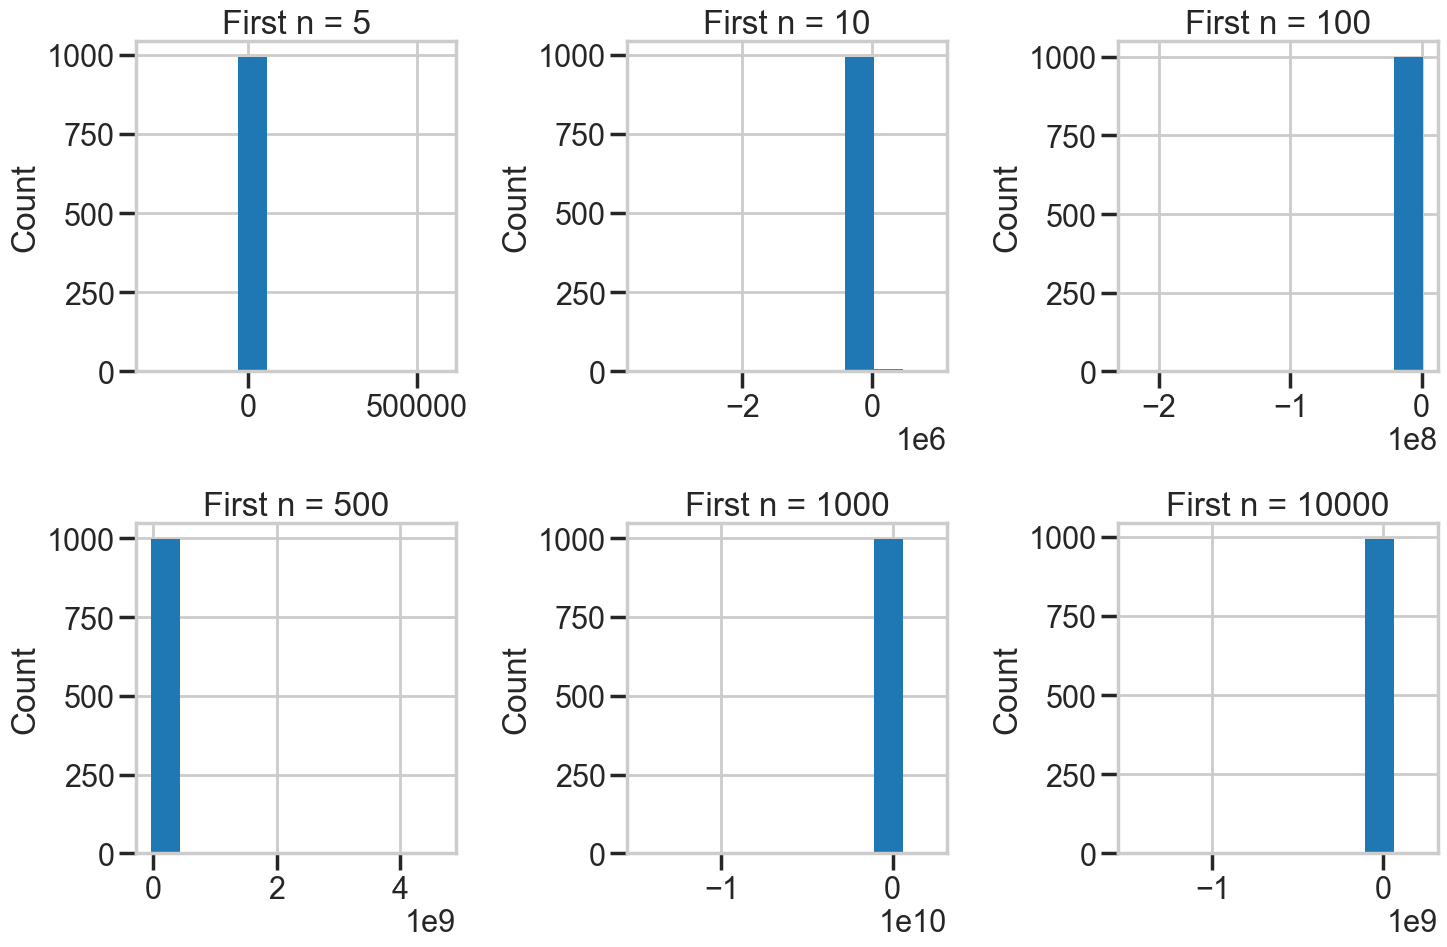

In [12]:
solutions_per_dfs = {}
for dfs in [10, 5, 2, 1, 0.5]:
    print(f'Degrees of freedom = {dfs}')

    cur_solver = Solver(dfs=dfs, M=M, N=N)
    cur_random_samples = cur_solver.draw_random_samples()
    cur_sample_means = cur_solver.compute_sample_means()
    cur_sample_mean_stats = cur_solver.compute_sample_mean_stats()
    cur_fig_sample_mean_distributions = cur_solver.plot_sample_mean_distributions()
    

    solutions[dfs] = {
        'random_samples': cur_random_samples,
        'sample_means': cur_sample_means,
        'sample_mean_stats': cur_sample_mean_stats,
        'sample_mean_distributions': cur_fig_sample_mean_distributions,
    }

    display(solutions[dfs]['sample_mean_stats'])
    print(50*'-')

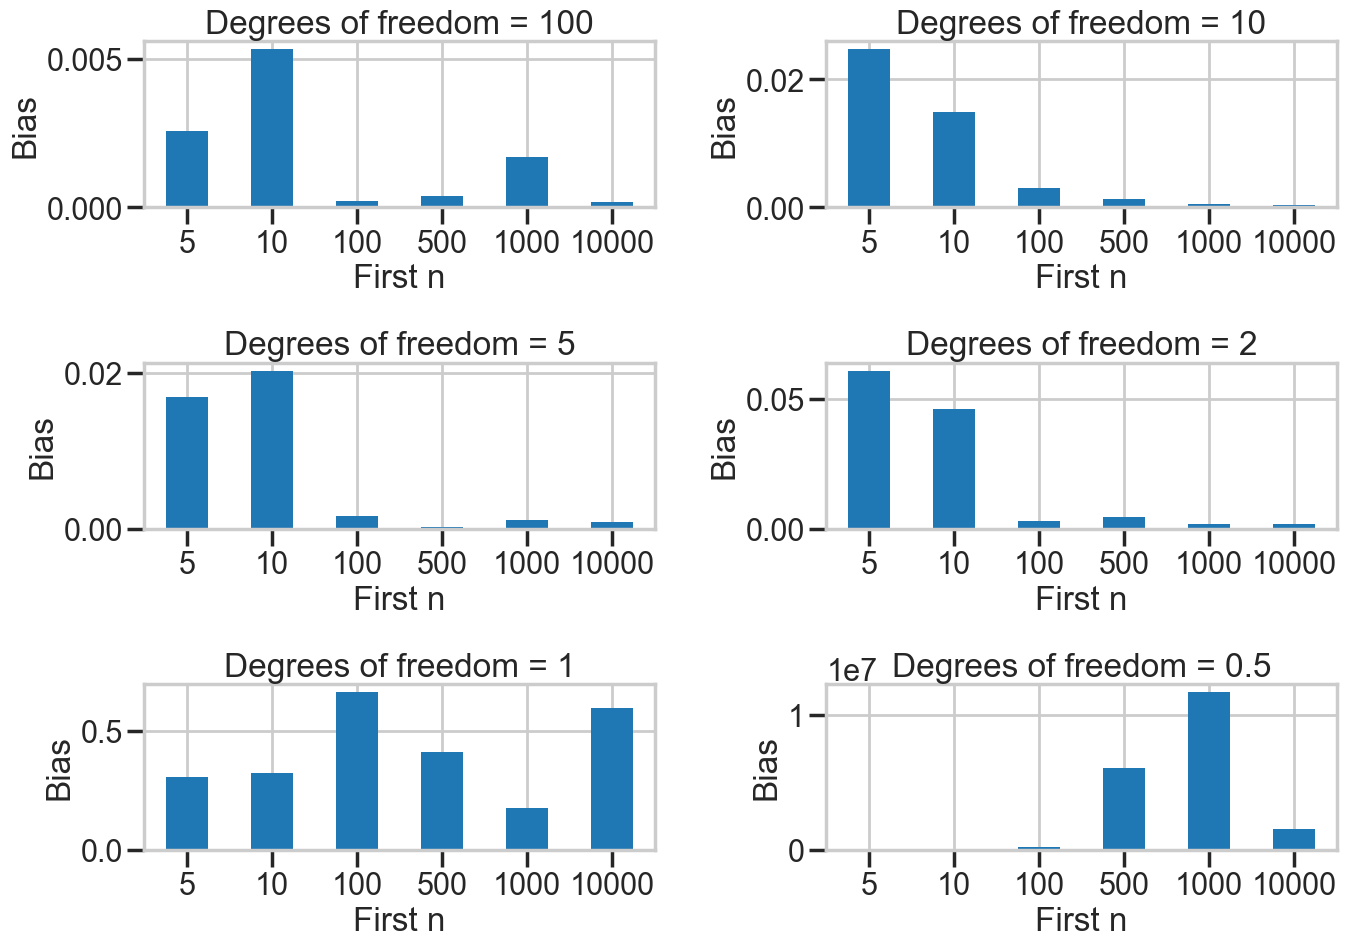

In [21]:
true_mean = 0.0

biases = {}
fig, axes = plt.subplots(3,2, figsize=(14, 10))
axes = axes.ravel()
for i, dfs in enumerate(solutions):
    biases[dfs] = (solutions[dfs]['sample_mean_stats'].loc['mean'] - true_mean).abs()
    pandas.Series(biases[dfs]).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Degrees of freedom = {dfs}')
    axes[i].set_ylabel('Bias')
    axes[i].set_xlabel('First n')
    axes[i].tick_params(axis='x', rotation=0)
fig.tight_layout();

Generally speaking, we can say that the LLN holds when degrees of freedom > 1. It does not hold for degrees of freedom <= 1.

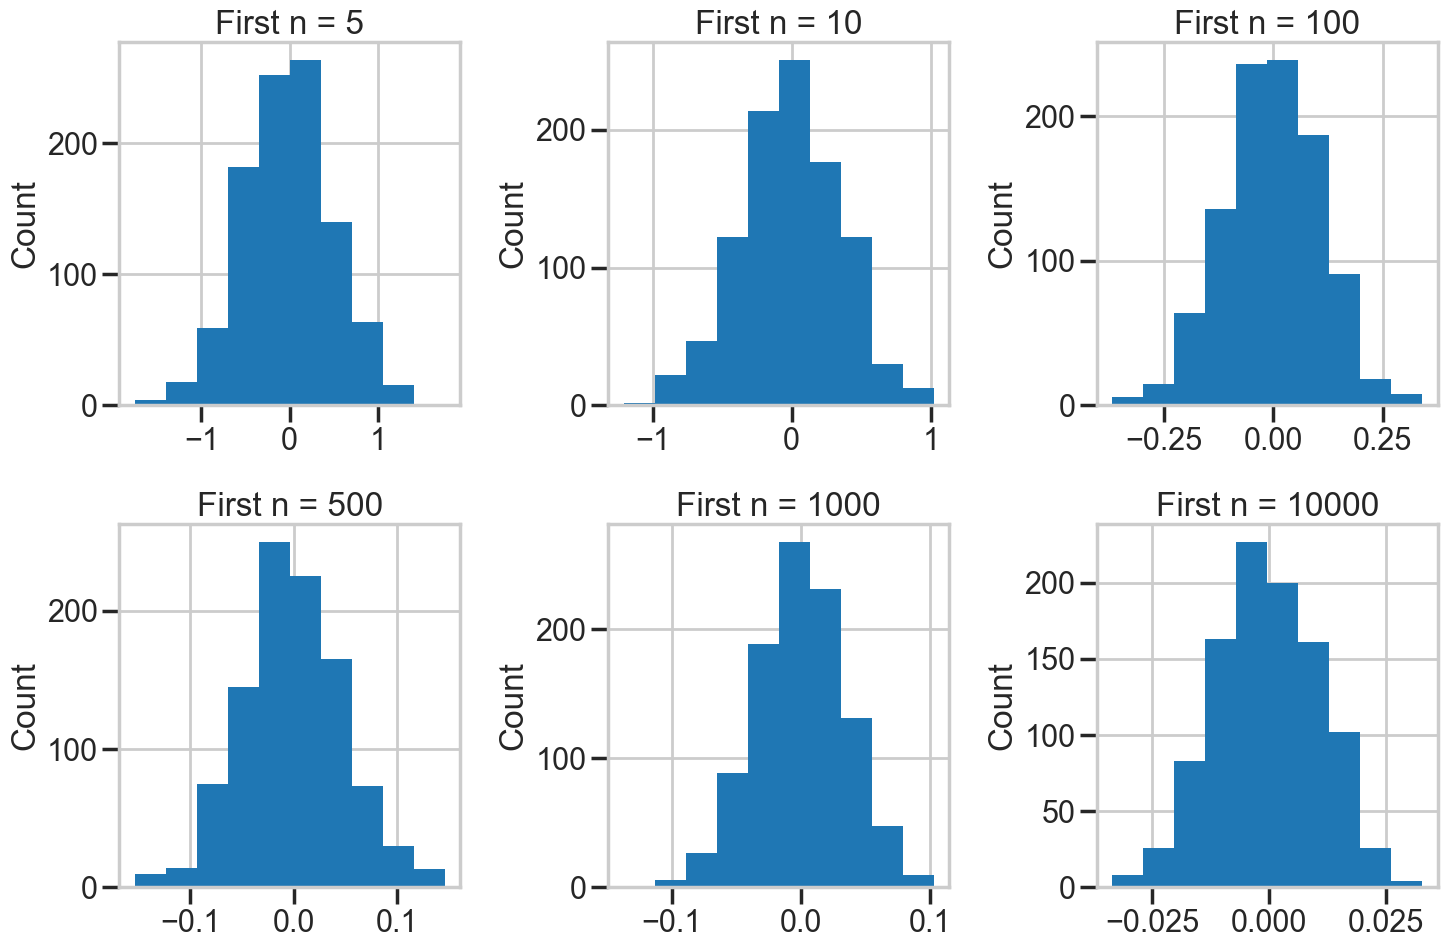

In [14]:
solutions[10]['sample_mean_distributions']

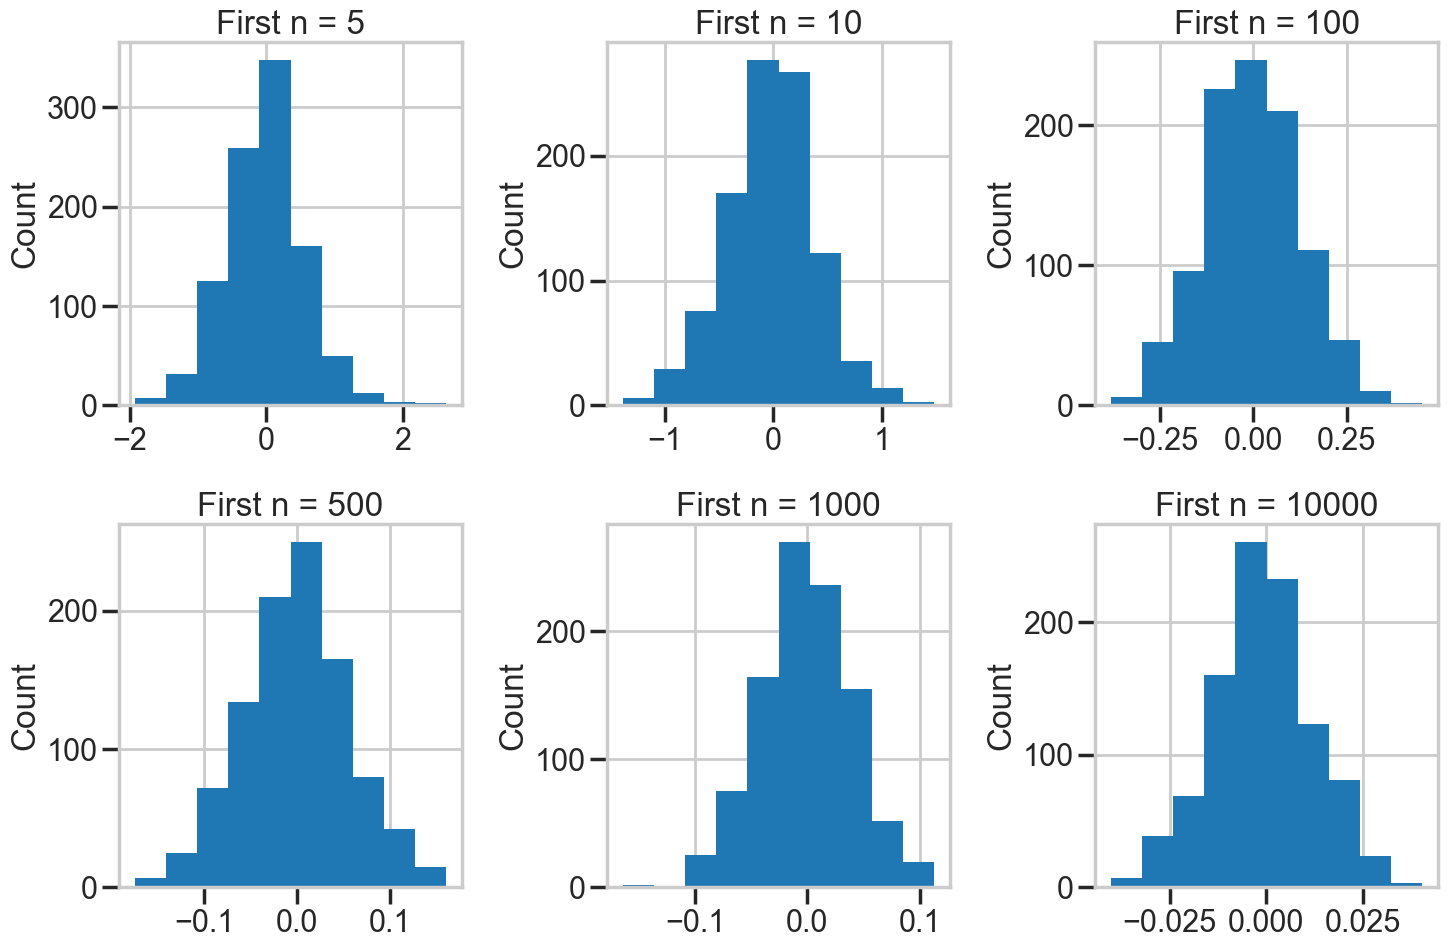

In [15]:
solutions[5]['sample_mean_distributions']

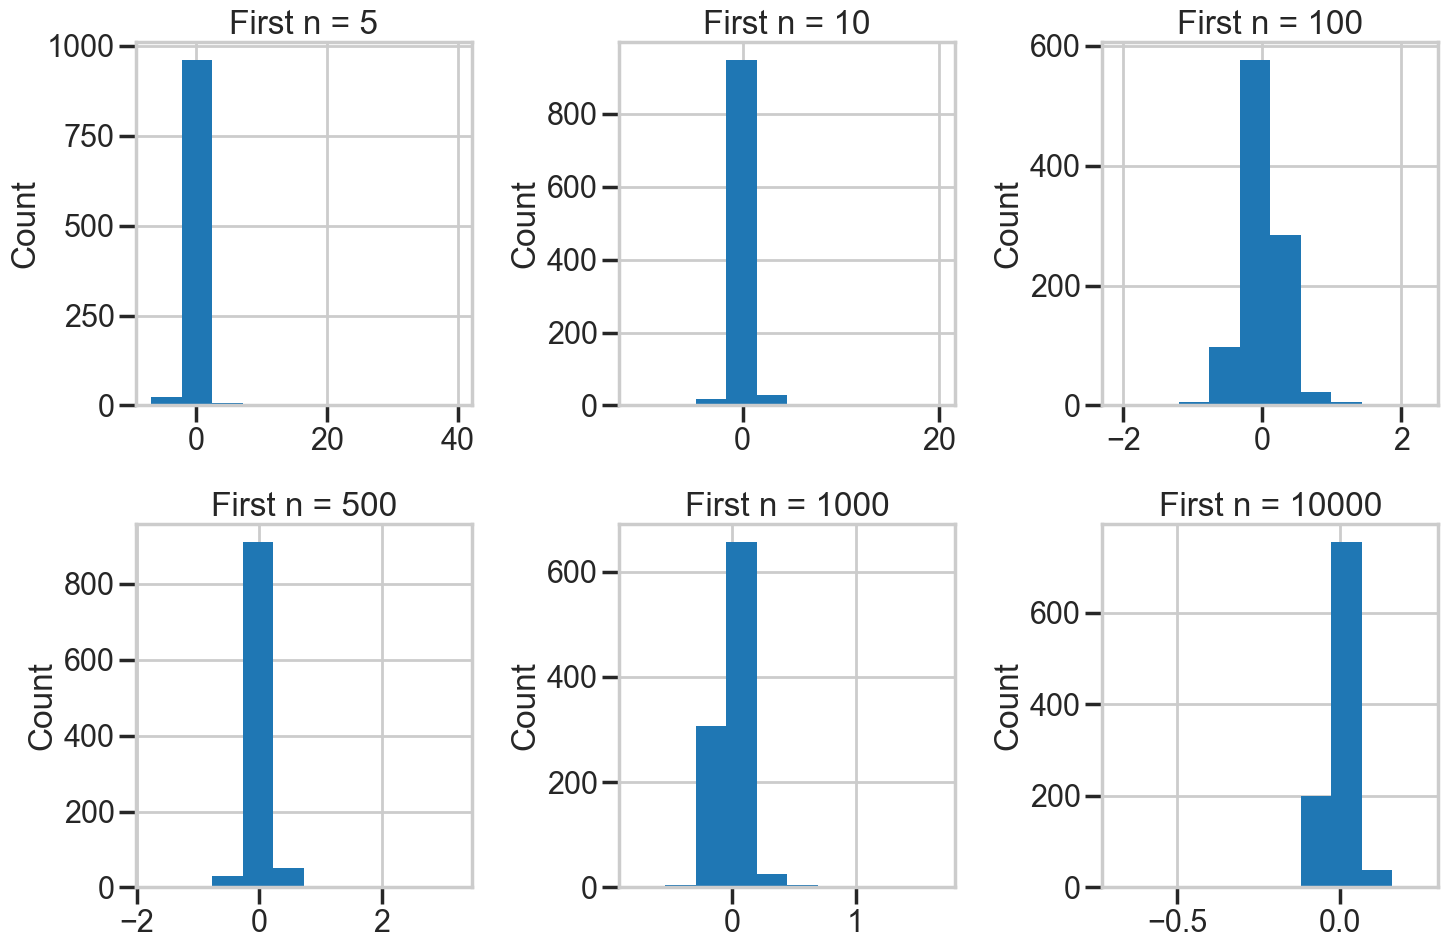

In [16]:
solutions[2]['sample_mean_distributions']

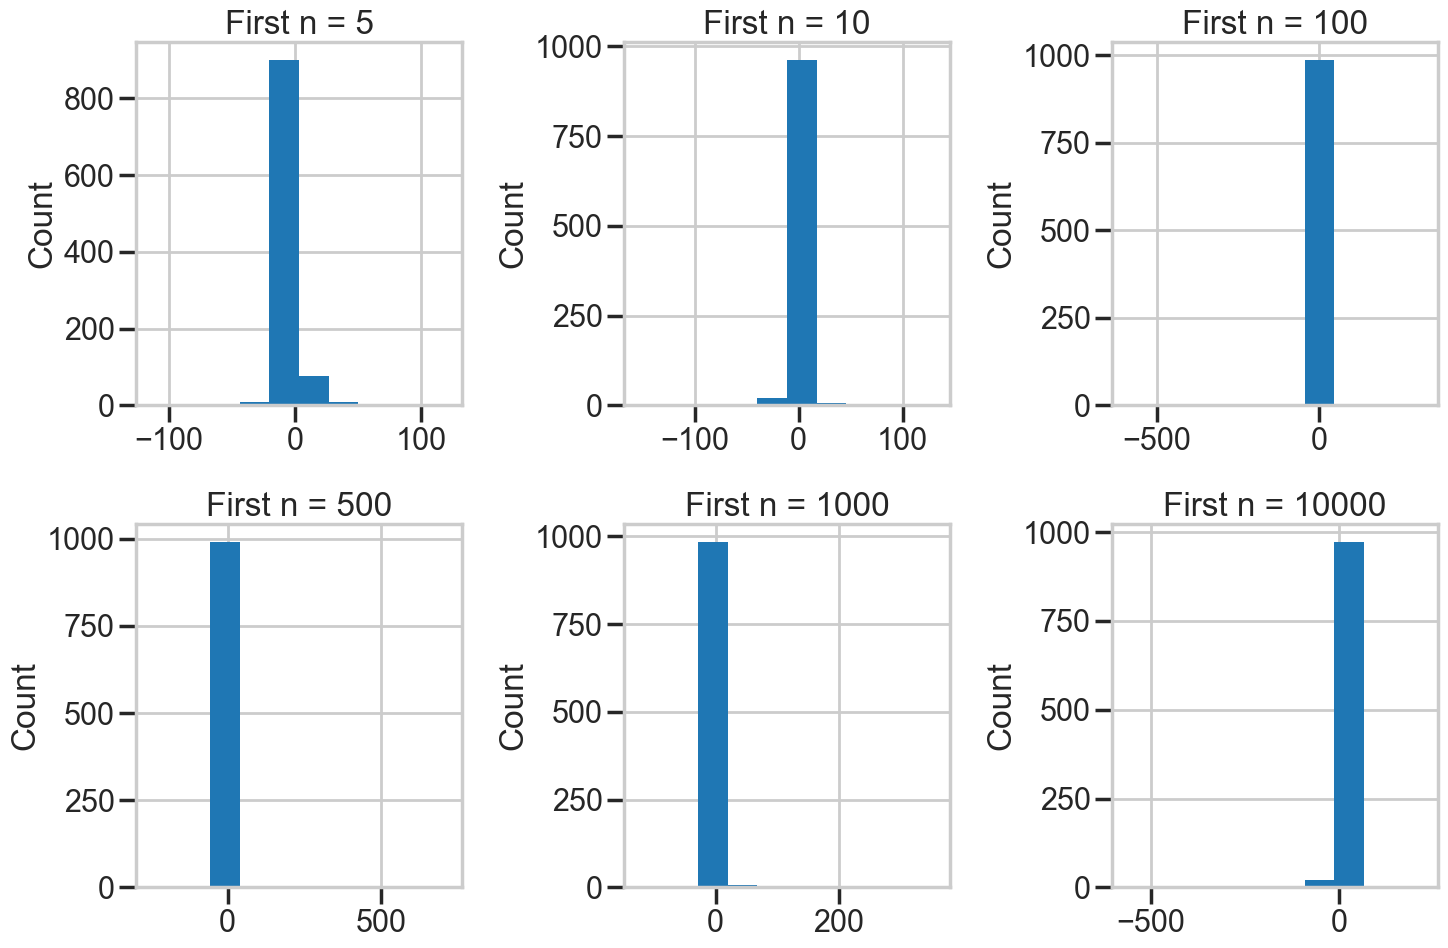

In [17]:
solutions[1]['sample_mean_distributions']

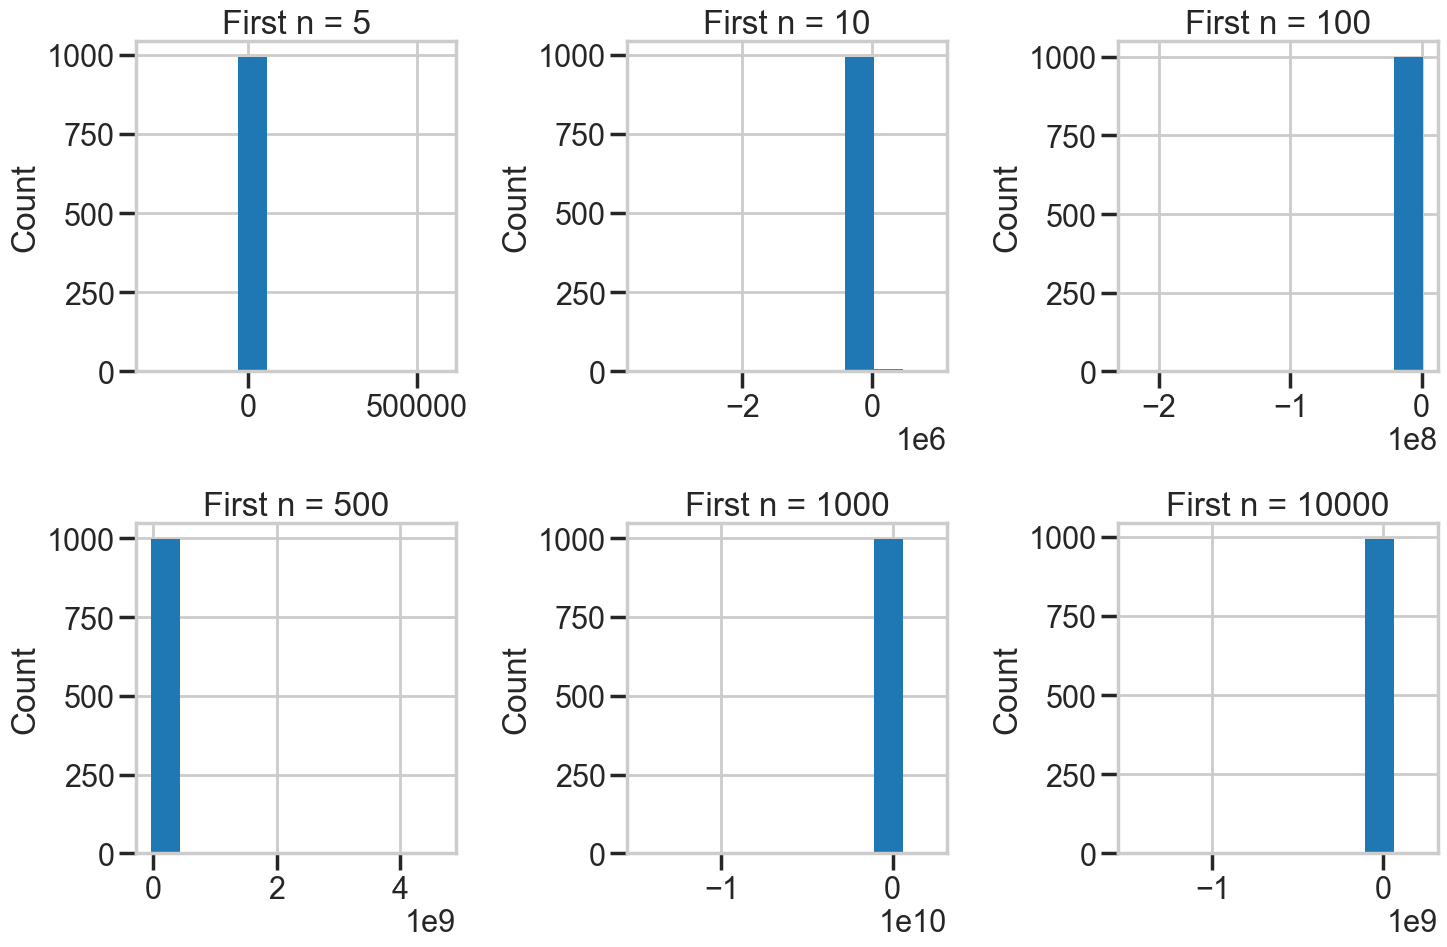

In [18]:
solutions[0.5]['sample_mean_distributions']

When degrees of freedom = 5 or 10, we do see that the variance of the sample mean reduces and the distribution converges to normal as $n$ increases.     
When degrees of freedom are equal or smaller than 2, some draws are extreme outliers. This makes the distribution non-normal for any number of draws, therefore, the CLT does not hold. This is in line with the theoretical properties of the standard $t(\nu)$ distribution. Its variance is infinite for 1 < degrees of freedom <=2 and undefined when degrees of freedom < 1, while the normal distribution is defined by two parameters -- mean and variance.

g) How does the value of 𝜈 affect the limiting behavior of the sample mean?

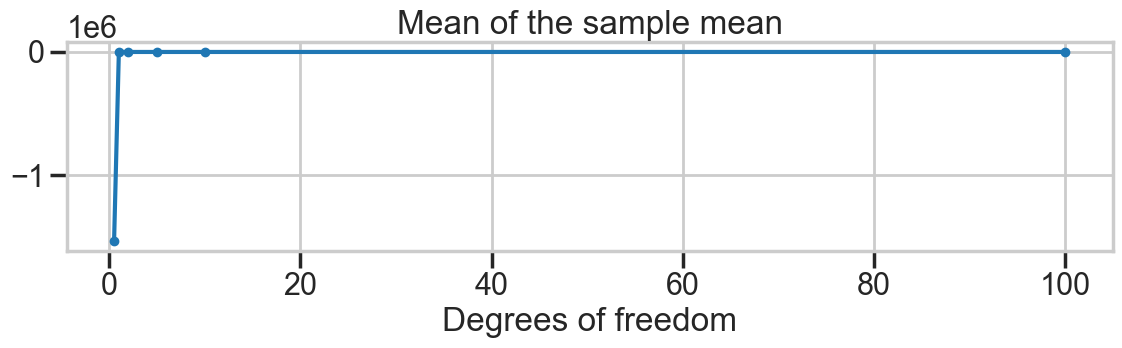

In [24]:
mean_per_dfs = {
    dfs: solutions[dfs]['sample_mean_stats'].loc['mean', 10_000]
    for dfs in solutions
}
pandas.Series(mean_per_dfs).sort_index().plot(figsize=(12,4), marker='.')
plt.xlabel('Degrees of freedom')
plt.title('Mean of the sample mean')
plt.tight_layout()

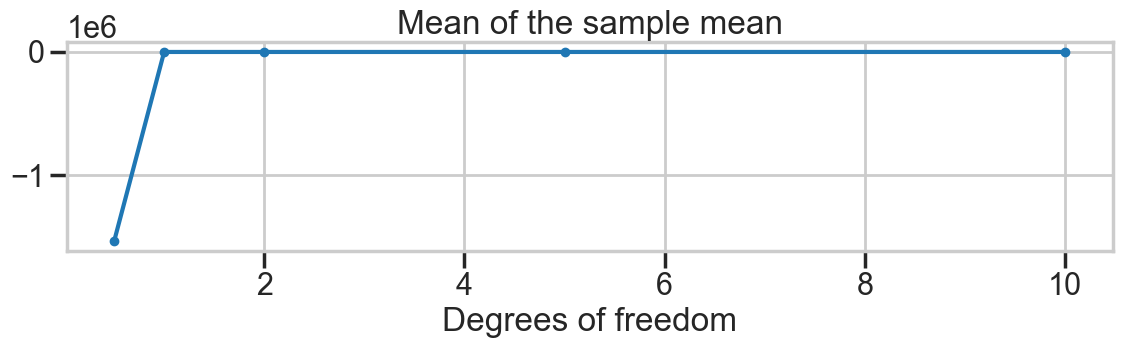

In [25]:
pandas.Series(mean_per_dfs).sort_index().drop([100]).plot(figsize=(12,4), marker='.')
plt.xlabel('Degrees of freedom')
plt.title('Mean of the sample mean')
plt.tight_layout()

We can see that the mean converges to 0 when degrees of freedom >=1. The theoretical mean of standard $t(\nu)$ distribution is 0 when degrees of freedom > 1, otherwise it is undefined.